In [1]:
!curl -o bubble.jpg https://img.freepik.com/free-vector/set-helium-balloon-flying-air-balls-happy-birthday-holiday-party-decoration_284092-1110.jpg?size=338&ext=jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21340  100 21340    0     0   484k      0 --:--:-- --:--:-- --:--:--  484k


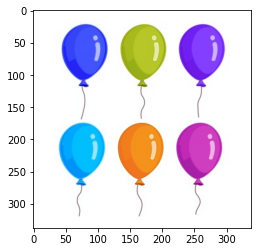

In [2]:
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
path = 'bubble.jpg'
imgraw = cv2.imread(path)
plt.imshow(imgraw)
plt.show()

## 1.Split each color channel of the image

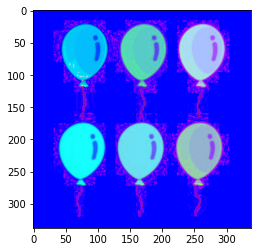

In [3]:
img = cv2.cvtColor(imgraw, cv2.COLOR_BGR2HSV)
plt.imshow(img)
plt.show()

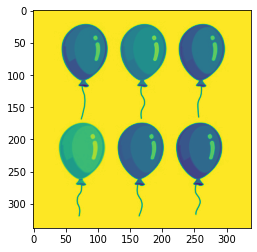

In [4]:
img = cv2.cvtColor(imgraw, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.show()

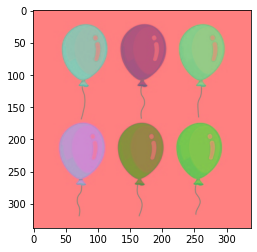

In [5]:
img = cv2.cvtColor(imgraw, cv2.COLOR_BGR2LAB)
plt.imshow(img)
plt.show()

## 2.Locate the position of each balloon by drawing a rectangle(bounding-box) surrounding each balloon

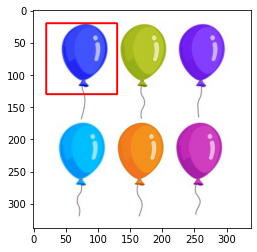

In [6]:
start_point = (20, 20)
end_point = (130, 130)
color = (255, 0, 0)
thickness = 2
image = cv2.rectangle(imgraw, start_point, end_point, color, thickness)
plt.imshow(image)
plt.show()

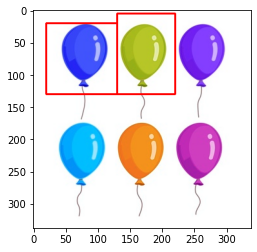

In [7]:

start_point = (130, 5)
end_point = (220, 130)
color = (255, 0, 0)
thickness = 2
image = cv2.rectangle(imgraw, start_point, end_point, color, thickness)
plt.imshow(image)
plt.show()

## 3.Name each balloon by putting a text of color name right above the bounding boxes.

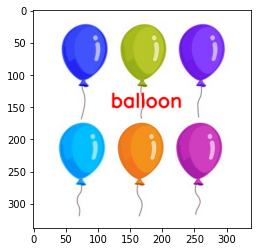

In [8]:
path = 'bubble.jpg'
imgraw = cv2.imread(path)

font = cv2.FONT_HERSHEY_SIMPLEX

org = (120, 150)

fontScale = 1

color = (255, 0, 0)

thickness = 2
image = cv2.putText(imgraw, 'balloon', org, font,
				fontScale, color, thickness, cv2.LINE_AA)

plt.imshow(image)
plt.show()

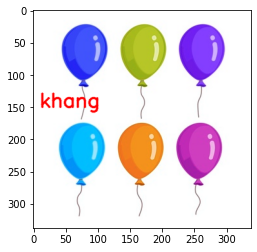

In [9]:
path = 'bubble.jpg'
imgraw = cv2.imread(path)

font = cv2.FONT_HERSHEY_SIMPLEX

org = (10, 150)

fontScale = 1

color = (255, 0, 0)

thickness = 2
image = cv2.putText(imgraw, 'khang', org, font,
				fontScale, color, thickness, cv2.LINE_AA)

plt.imshow(image)
plt.show()

## 4.Extract the yellow balloon by creating a new image of only one balloon.
Hint: Extract a rectangle ROI using a predefined position

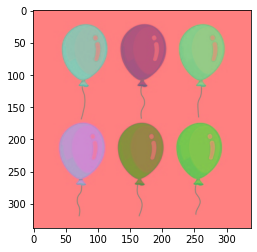

In [14]:
ball = img[273:333, 100:160]
img[273:333, 100:160] = ball

plt.imshow(img)
plt.show()

## 5.Extract the yellow balloon automatically by using HSV color space to extract only pixels of yellow color.
Hint: Change into HSV color space, then filter the yellow pixels by keeping only
pixels having a range of H-values of yellow (try to find the range by yourself)
https://docs.opencv.org/master/df/d9d/tutorial_py_colorspaces.html

In [11]:
!curl -o yellow.jpg https://i.stack.imgur.com/JhHfD.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 85959  100 85959    0     0  1614k      0 --:--:-- --:--:-- --:--:-- 1614k


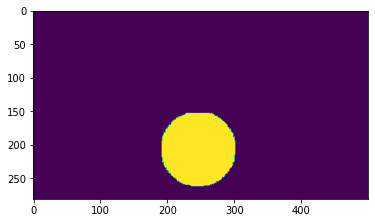

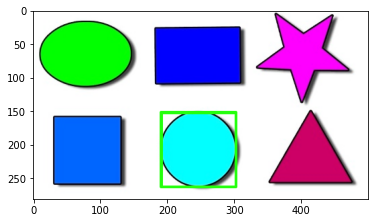

In [12]:
import numpy as np
import cv2

image = cv2.imread('yellow.jpg')

original = image.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower = np.array([22, 93, 0], dtype="uint8")
upper = np.array([45, 255, 255], dtype="uint8")
mask = cv2.inRange(image, lower, upper)

cnts = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (36,255,12), 2)

plt.imshow(mask)
plt.show()

plt.imshow(original)
plt.show()

## 6.Re-paint the yellow balloon by replacing the pixels of yellow by green.
Hint: Filter yellow pixels by HSV space and replace the value of the pixels by
new values (green color)

## 7.Rotate the first balloon an angle of 20 degree